In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [77]:
df = pd.read_csv("economic_index.csv")

In [78]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [79]:
df.drop(columns=["Unnamed: 0","year", "month"], axis=1,inplace=True)

In [80]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [81]:
df.isnull()
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

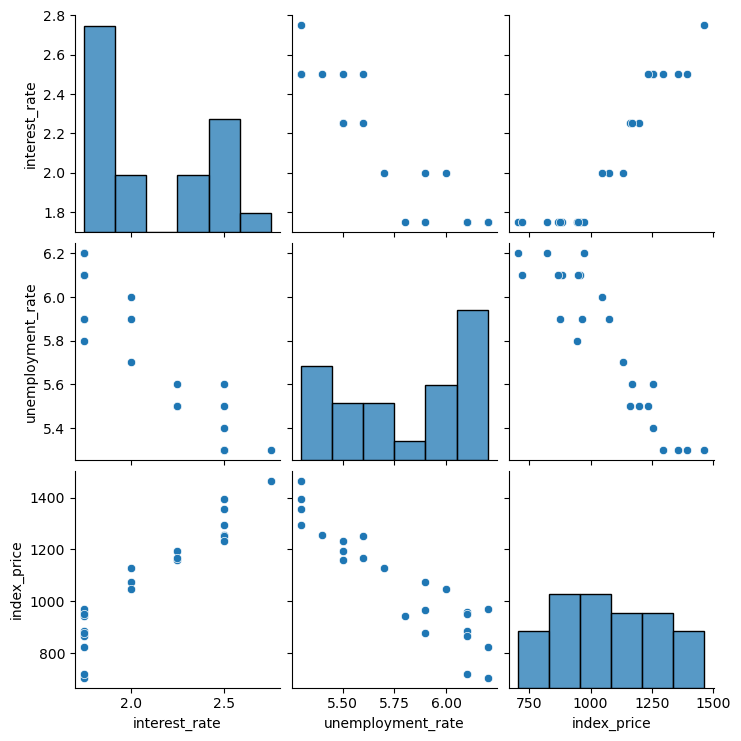

In [82]:
sns.pairplot(df)

In [83]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [84]:
# plt.scatter(df['interest_rate'], df['unemployment_rate'], color='r')

In [85]:
# X = df.iloc[:,:,-1]
# y = df,iloc[:,-1]

X = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

In [86]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [87]:
# train test split 
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [97]:
X_test.head()

,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9


<Axes: xlabel='interest_rate', ylabel='index_price'>

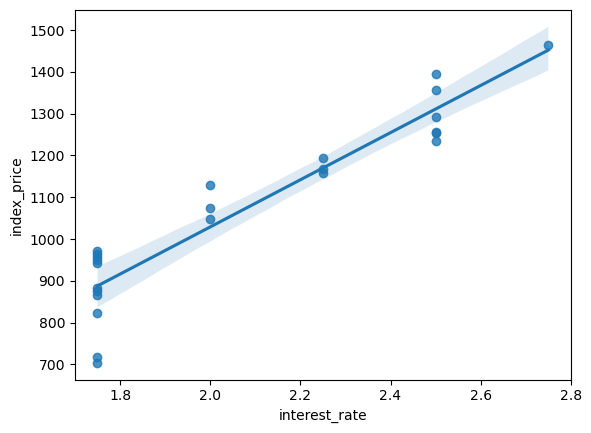

In [98]:
sns.regplot(x= df['interest_rate'],y = df['index_price'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

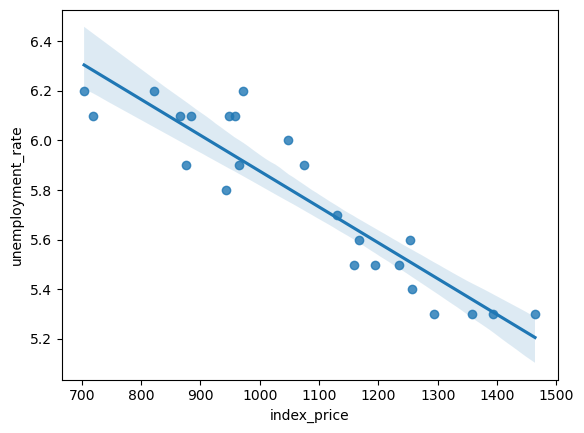

In [99]:
sns.regplot(x= df['index_price'],y = df['unemployment_rate'])

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
X_train

array([[ 0.55339859, -0.53244666],
       [-0.9486833 ,  0.41597395],
       [ 1.30443953, -1.48086727],
       [-0.9486833 ,  1.36439457],
       [ 1.30443953, -0.53244666],
       [ 1.30443953, -1.48086727],
       [-0.19764235,  0.73211416],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -1.48086727],
       [ 1.30443953, -1.16472707],
       [-0.9486833 ,  1.36439457],
       [-0.9486833 ,  1.04825436],
       [-0.9486833 ,  0.41597395],
       [-0.9486833 ,  1.04825436],
       [ 0.55339859, -0.84858687],
       [-0.19764235, -0.21630646],
       [-0.9486833 ,  0.09983375],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -0.84858687]])

In [104]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [105]:
print(X_train.shape)
print(y_train.shape)

(19, 2)
(19,)


In [106]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(
    regression,
    X_train,
    y_train, 
    scoring='neg_mean_squared_error'
)